In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sns

In [2]:
# Reading Titanic dataset
td=pd.read_csv("titanic_dataset.csv")

In [3]:
td.shape

(891, 12)

In [4]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Three coloumns Age, Cabin and Embarked have null values.

In [6]:
td.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
td['Embarked'].nunique()

3

In [9]:
td['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
td.groupby(['Embarked']).size()

Embarked
C    168
Q     77
S    644
dtype: int64

* We would impute the null values of Embarked column with 'S'.

In [11]:
td['Embarked'].fillna("S", inplace = True)

In [12]:
td.loc[:,"Age"].median()

28.0

* We would impute the null values of Age column with median value of age.

In [13]:
td['Age'] = td['Age'].fillna((td['Age'].median()))

In [14]:
td['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

* The column Cabin would be dropped as it has too many null values.
* The columns PassengerId, Name, Ticket would also be dropped as they are not relevant in predicting survival.

In [15]:
tdnew=td.drop(["PassengerId","Name", "Ticket", "Cabin"], axis=1)

In [16]:
tdnew.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


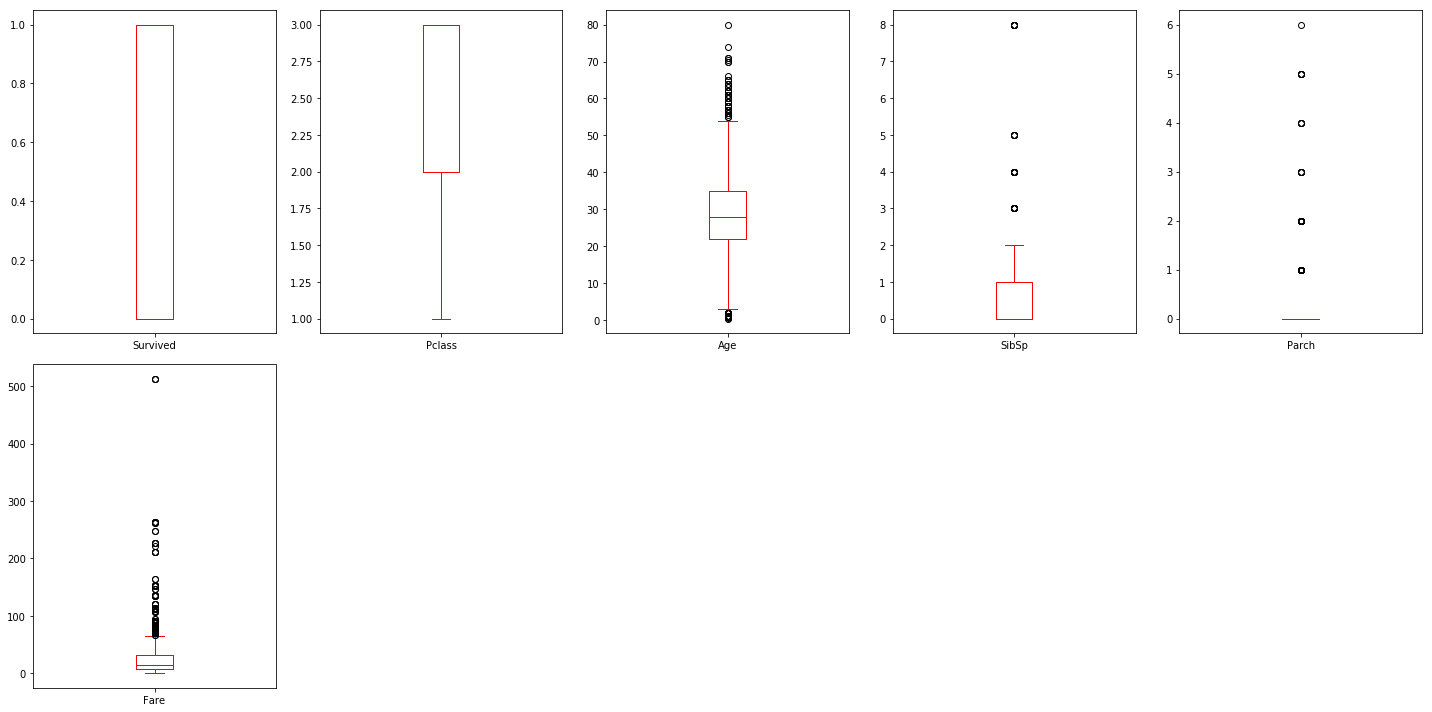

In [17]:
# To check for outliers
tdnew.plot(kind='box',color='Red',subplots=True,layout=(2,5),sharex=False,figsize=(20,10))
mpl.tight_layout()
mpl.show()

In [18]:
tdnew.SibSp.quantile(.99) 

5.0

In [19]:
td[td.SibSp > td.SibSp.quantile(.99)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,NaN,S


In [20]:
td['SibSp']=np.where(tdnew['SibSp'] > 5,5,tdnew['SibSp'])

1. The variables Fare, Age, Parch and SibSp have outliers.
2. The outlier treatment was done on the SibSp coloumn after logistic model regression was run using the complete data, as it was found that it is significant predictor at 5% significance level. Though after treatment logistic regression was run again it didnt alter the output.
3. As Age predictor was converted to categorical variable Adult/Child based on age no treatment of outliers was required.
4. Fare and Parch were insignificant and hence no treatment was required.

In [21]:
tdnew.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

* The Age variable is converted to categorical,  where anyone below than or equal to the age of 15 would be categorized as child and above as adults.

In [22]:
tdnew['Age'] = np.where(tdnew['Age'] > 15,"Adult","Child")

In [23]:
tda=tdnew

In [24]:
tda.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,Adult,1,0,7.2500,S
1,1,1,female,Adult,1,0,71.2833,C
2,1,3,female,Adult,0,0,7.9250,S
3,1,1,female,Adult,1,0,53.1000,S
4,0,3,male,Adult,0,0,8.0500,S


* Analysing the data with cross tabs

In [25]:
# 1 Classwise Survival status
 
pd.crosstab(tda.Pclass, tda.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [26]:
# Classwise and Genderwise Survival status
 
pd.crosstab([tda.Pclass,tda.Sex], tda.Survived,margins=True)

Survived         0    1  All
Pclass Sex                  
1      female    3   91   94
       male     77   45  122
2      female    6   70   76
       male     91   17  108
3      female   72   72  144
       male    300   47  347
All            549  342  891

In [27]:
# Classwise and Agewise Survival status
pd.crosstab([tda.Pclass,tda.Age], tda.Survived,margins=True)

Survived        0    1  All
Pclass Age                 
1      Adult   79  131  210
       Child    1    5    6
2      Adult   97   68  165
       Child    0   19   19
3      Adult  339   94  433
       Child   33   25   58
All           549  342  891

In [28]:
# Classwise and Agewise Survival status
pd.crosstab([tda.Pclass,tda.SibSp], tda.Survived,margins=True)

Survived        0    1  All
Pclass SibSp               
1      0       60   77  137
       1       18   53   71
       2        1    4    5
       3        1    2    3
2      0       70   50  120
       1       23   32   55
       2        4    4    8
       3        0    1    1
3      0      268   83  351
       1       56   27   83
       2       10    5   15
       3       11    1   12
       4       15    3   18
       5        5    0    5
       8        7    0    7
All           549  342  891

In [29]:
tdnew.dtypes

Survived      int64
Pclass        int64
Sex          object
Age          object
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

* Creating dummies for the categorical variables

In [30]:
tdnew = pd.get_dummies(tdnew,drop_first=True,columns=['Sex','Age','Pclass','Embarked'])


In [31]:
tdnew.head()

,Survived,SibSp,Parch,Fare,Sex_male,Age_Child,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,1,0,7.2500,1,0,0,1,0,1
1,1,1,0,71.2833,0,0,0,0,0,0
2,1,0,0,7.9250,0,0,0,1,0,1
3,1,1,0,53.1000,0,0,0,0,0,1
4,0,0,0,8.0500,1,0,0,1,0,1


# Logistic Regression using statsmodel

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(tdnew.drop('Survived', axis=1), tdnew['Survived'],\
                                                    test_size=0.2, random_state=115)


In [34]:
import statsmodels.api as sm

In [35]:
X_train = sm.add_constant(X_train)

In [36]:
X_train.head()

,const,SibSp,Parch,Fare,Sex_male,Age_Child,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
638,1.0,0,5,39.6875,0,0,0,1,0,1
278,1.0,4,1,29.1250,1,1,0,1,1,0
611,1.0,0,0,7.0500,1,0,0,1,0,1
420,1.0,0,0,7.8958,1,0,0,1,0,0
158,1.0,0,0,8.6625,1,0,0,1,0,1


In [37]:
Y_train.head()

638    0
278    0
611    0
420    0
158    0
Name: Survived, dtype: int64

In [38]:
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())

In [39]:
result = logit.fit()

In [40]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      702
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -319.80
Date:                Fri, 18 Jan 2019   Deviance:                       639.61
Time:                        21:12:22   Pearson chi2:                     740.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4538      0.386      6.362      0.000       1.698       3.210
SibSp         -0.3991      0.135     -2.962      0.0

In [41]:
print(result.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            659.6059  
Link Function:      logit            BIC:            -3971.1848
Dependent Variable: Survived         Log-Likelihood: -319.80   
Date:               2019-01-18 21:12 LL-Null:        -474.46   
No. Observations:   712              Deviance:       639.61    
Df Model:           9                Pearson chi2:   740.      
Df Residuals:       702              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           2.4538   0.3857   6.3624 0.0000  1.6979  3.2097
SibSp          -0.3991   0.1348  -2.9617 0.0031 -0.6632 -0.1350
Parch          -0.2315   0.1360  -1.7019 0.0888 -0.4981  0.0351
Fare            0.0043   0.0030   1.4653 0.1428 -0.0015

# Observations
Coefficients:
* For unit change in the value of variable the log of odds ratio of survival is represented by the value of coefficients as calculated above.

Probabilities:
* Except for Parch, Fare, Embarked_Q and Embarked_S, all the other variables seem to be significant in predicting the survival rate at 5% significance level.
Hence we will first drop the variable Embarked_Q and run the regression model retaining all the other variables.

In [42]:
X_train = X_train.drop("Embarked_Q", axis=1)

In [43]:
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())

In [44]:
result1 = logit.fit()

In [45]:
print(result1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      703
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -319.97
Date:                Fri, 18 Jan 2019   Deviance:                       639.94
Time:                        21:12:23   Pearson chi2:                     735.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5240      0.367      6.873      0.000       1.804       3.244
SibSp         -0.3971      0.135     -2.946      0.0

In [46]:
print(result1.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            657.9411  
Link Function:      logit            BIC:            -3977.4177
Dependent Variable: Survived         Log-Likelihood: -319.97   
Date:               2019-01-18 21:12 LL-Null:        -474.46   
No. Observations:   712              Deviance:       639.94    
Df Model:           8                Pearson chi2:   735.      
Df Residuals:       703              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           2.5240   0.3672   6.8729 0.0000  1.8042  3.2438
SibSp          -0.3971   0.1348  -2.9456 0.0032 -0.6613 -0.1329
Parch          -0.2351   0.1360  -1.7288 0.0838 -0.5017  0.0314
Fare            0.0042   0.0029   1.4286 0.1531 -0.0016

* Except Parch Fare and Pclass_2 all the other variables seem to be significant in predicting the survival rate at 5% significance level. Hence we will drop Fare for now and rerun the model.

In [47]:
X_train = X_train.drop("Fare", axis=1)

In [48]:
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())

In [49]:
result2 = logit.fit()

In [50]:
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      704
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -321.21
Date:                Fri, 18 Jan 2019   Deviance:                       642.42
Time:                        21:12:24   Pearson chi2:                     740.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8458      0.300      9.495      0.000       2.258       3.433
SibSp         -0.3702      0.132     -2.795      0.0

In [51]:
print(result2.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            658.4203  
Link Function:      logit            BIC:            -3981.5066
Dependent Variable: Survived         Log-Likelihood: -321.21   
Date:               2019-01-18 21:12 LL-Null:        -474.46   
No. Observations:   712              Deviance:       642.42    
Df Model:           7                Pearson chi2:   740.      
Df Residuals:       704              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           2.8458   0.2997   9.4947 0.0000  2.2583  3.4332
SibSp          -0.3702   0.1324  -2.7953 0.0052 -0.6297 -0.1106
Parch          -0.1809   0.1300  -1.3910 0.1642 -0.4357  0.0740
Sex_male       -2.6534   0.2212 -11.9980 0.0000 -3.0868

* Parch seems to be insignificant in predicting the survival rate at 5% significance level. Hence we will drop Parch and run the model.

In [52]:
X_train = X_train.drop("Parch", axis=1)

In [53]:
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())

In [54]:
result3=logit.fit()

In [55]:
print(result3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      705
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -322.20
Date:                Fri, 18 Jan 2019   Deviance:                       644.41
Time:                        21:12:24   Pearson chi2:                     741.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7493      0.288      9.532      0.000       2.184       3.315
SibSp         -0.4043      0.130     -3.102      0.0

* All the variables seem to be significant in determining the survival rate.

In [56]:
print(result3.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            658.4078  
Link Function:      logit            BIC:            -3986.0871
Dependent Variable: Survived         Log-Likelihood: -322.20   
Date:               2019-01-18 21:12 LL-Null:        -474.46   
No. Observations:   712              Deviance:       644.41    
Df Model:           6                Pearson chi2:   741.      
Df Residuals:       705              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           2.7493   0.2884   9.5323 0.0000  2.1840  3.3145
SibSp          -0.4043   0.1303  -3.1020 0.0019 -0.6597 -0.1488
Sex_male       -2.5823   0.2134 -12.1008 0.0000 -3.0006 -2.1641
Age_Child       1.4250   0.3975   3.5845 0.0003  0.6458

We see that the remaining predictors are all significant. So, we keep this as our final model.

In [57]:
result3.params

const         2.749256
SibSp        -0.404256
Sex_male     -2.582323
Age_Child     1.424999
Pclass_2     -0.785699
Pclass_3     -1.976152
Embarked_S   -0.531574
dtype: float64

* for all the parameters for a unit increase in the variable value , the log odds ratio of survival changes by factor as calculated above.

In [58]:
np.exp(result3.params)

const         15.630999
SibSp          0.667473
Sex_male       0.075598
Age_Child      4.157853
Pclass_2       0.455801
Pclass_3       0.138602
Embarked_S     0.587679
dtype: float64

* for all the parameters for a unit increase in the variable value , the odds ratio of survival changes by factor as calculated above.

**Next, we make predictions on the test set.**

In [59]:
X_test = sm.add_constant(X_test.drop(['Parch', 'Fare', 'Embarked_Q'],axis=1))

In [60]:
X_test.head()

,const,SibSp,Sex_male,Age_Child,Pclass_2,Pclass_3,Embarked_S
327,1.0,0,0,0,1,0,1
481,1.0,0,1,0,1,0,1
880,1.0,0,0,0,1,0,1
530,1.0,1,0,1,1,0,1
232,1.0,0,1,0,1,0,1


In [61]:
probabilities = result3.predict(X_test)

In [62]:
probabilities.head()

327    0.807210
481    0.240427
880    0.807210
530    0.920761
232    0.240427
dtype: float64

In [63]:
predicted_classes = probabilities.map(lambda x: 1 if x > 0.5 else 0)

In [64]:
accuracy = sum(predicted_classes == Y_test) / len(Y_test)

Calculate accuracy score.

In [65]:
accuracy

0.8268156424581006

# Calculating evaluation metrics with SciKit Learn

**As constants have been added to Train and Test sets for running the regression in Stats model these are being dropped now as there is no requirement of constats in Scikitlearn.**

In [66]:
X_train = X_train.drop("const", axis=1)

In [67]:
X_test = X_test.drop("const", axis=1)

In [68]:
X_train.head()

,SibSp,Sex_male,Age_Child,Pclass_2,Pclass_3,Embarked_S
638,0,0,0,0,1,1
278,4,1,1,0,1,0
611,0,1,0,0,1,1
420,0,1,0,0,1,0
158,0,1,0,0,1,1


In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logit1 = LogisticRegression()

In [71]:
logit1.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
predictions = logit1.predict(X_test)

**Calculate Accuracy rate.**

In [73]:
logit1.score(X_test, Y_test)

0.8268156424581006

**Calculate Error rate**

In [74]:
1-logit1.score(X_test, Y_test)

0.17318435754189943

**Calculate Accuracy**

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(Y_test, predictions)

0.8268156424581006

**Calculate number of correctly classified observations.**

In [77]:
accuracy_score(Y_test, predictions, normalize=False)

148

**Calculate number of incorrectly classified observations.**

In [78]:
len(Y_test) - accuracy_score(Y_test, predictions, normalize=False)

31

**Calculate log loss**

In [79]:
from sklearn.metrics import log_loss

Encode predicted classes and test labels.

In [80]:
log_loss(Y_test, predictions)

5.9816338715576745

**Calculate Confusion Matrix**

In [81]:
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [82]:
confusion_mat = confusion_matrix(Y_test, predictions)

In [83]:
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])

In [84]:
confusion_df

,Predicted neg,Predicted pos
Actual neg,98,13
Actual pos,18,50


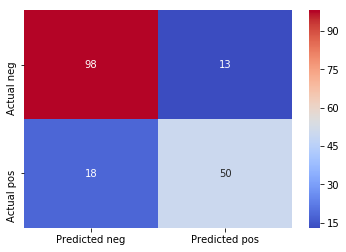

In [85]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

**Calculate precision and recall scores**

In [86]:
from sklearn.metrics import precision_score, recall_score

In [87]:
precision_score(Y_test, predictions)

0.7936507936507936

In [88]:
recall_score(Y_test, predictions)

0.7352941176470589

**Calculate F1 Score**

In [89]:
from sklearn.metrics import f1_score

In [90]:
f1_score(Y_test, predictions)

0.7633587786259542

**Plot precision Recall Threshold curve**

In [91]:
from sklearn.metrics import precision_recall_curve

In [92]:
Y_scores = logit1.predict_proba(X_test)[:, 1]

In [93]:
p, r, thresholds = precision_recall_curve(Y_test, Y_scores)

In [94]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    mpl.figure(figsize=(8, 8))
    mpl.title("Precision and Recall Scores as a function of the decision threshold")
    mpl.plot(thresholds, precisions[:-1], "b--", label="Precision")
    mpl.plot(thresholds, recalls[:-1], "g-", label="Recall")
    mpl.ylabel("Score")
    mpl.xlabel("Decision Threshold")
    mpl.legend(loc='best')


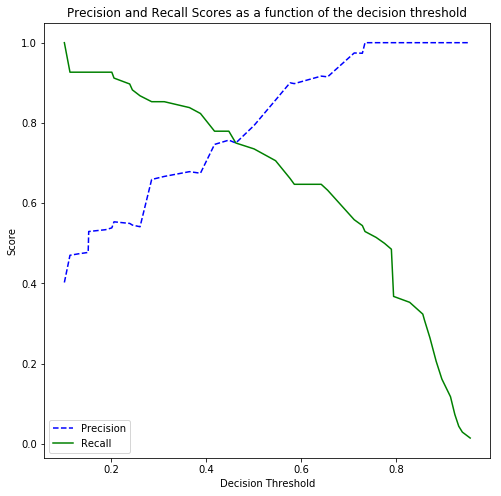

In [95]:
plot_precision_recall_vs_threshold(p, r, thresholds)

**Plot the ROC curve and calculate Area under the ROC curve**

In [96]:
from sklearn.metrics import roc_curve, roc_auc_score

Let's take probablities from our classifier, instead of classes.

In [97]:
probs = logit1.predict_proba(X_test)[:, 1]

In [98]:
auc = roc_auc_score(Y_test, probs)
print(auc)

0.8798357180710122


** AUC of 0.88 indicates reasonably good prediction.

In [99]:
fpr, tpr, threshold = roc_curve(Y_test, probs)

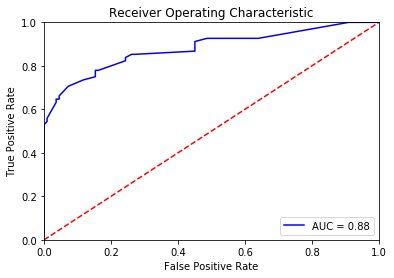

In [100]:
mpl.title('Receiver Operating Characteristic')
mpl.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
mpl.legend(loc = 'lower right')
mpl.plot([0, 1], [0, 1],'r--')
mpl.xlim([0, 1])
mpl.ylim([0, 1])
mpl.ylabel('True Positive Rate')
mpl.xlabel('False Positive Rate')
mpl.show()

We can also calculate the optimal threshold probability from this ROC curve

In [101]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]

In [102]:
optimal_threshold

0.54622855808208

# Update model based on optimal probability threshold

Let's use this new optimal threshold and update our predictions

In [103]:
new_predictions = np.where(probs>optimal_threshold, 1, 0)

In [104]:
new_confusion_mat = confusion_matrix(Y_test, new_predictions)

In [105]:
new_confusion_df = pd.DataFrame(new_confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])

In [106]:
new_confusion_df

,Predicted neg,Predicted pos
Actual neg,106,5
Actual pos,23,45


Calculate the updated accuracy score and log loss metrics

In [107]:
accuracy_score(Y_test, new_predictions)

0.8435754189944135

In [108]:
log_loss(Y_test, new_predictions)

5.402735961143296

In [109]:
f1_score(Y_test, new_predictions)

0.7627118644067796

In [110]:
precision_score(Y_test, new_predictions)

0.9

In [111]:
recall_score(Y_test, new_predictions)

0.6617647058823529

**Observations:
    * Accuracy increased to 84.3% from 82.5% which is good.
    * log_loss decreased to 5.4 from  5.98 which is good.
    * f1_score decreased very slightly to 0.762 from 0.763 .
    * Precision increased to 0.9 from 0.79 which is good.
    * Recall decreased to 0.66 from 0.735. Here we need to decide what is the rate we desire?  As we are more interested in       the survival we will reduce the probability to around 0.45 and check if this rate would improve.  
    

In [112]:
new_predictions1 = np.where(probs>0.45, 1, 0)

In [113]:
new_confusion_mat = confusion_matrix(Y_test, new_predictions1)

In [114]:
new_confusion_df = pd.DataFrame(new_confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])

In [115]:
new_confusion_df

,Predicted neg,Predicted pos
Actual neg,94,17
Actual pos,17,51


In [116]:
accuracy_score(Y_test, new_predictions1)

0.8100558659217877

In [117]:
log_loss(Y_test, new_predictions1)

6.560513913873054

In [118]:
f1_score(Y_test, new_predictions1)

0.75

In [119]:
precision_score(Y_test, new_predictions1)

0.75

In [120]:
recall_score(Y_test, new_predictions1)

0.75

**Observations:
    * Accuracy decreased to 81% from 84.3%.
    * log_loss increased  to 6.5 from 5.4.
    * f1_score decreased slightly to 0.75 from 0.763.
    * Precision decreased to 0.75 from 0.9.
    * Recall increased to 0.75 from 0.66.
Though the recall has increased the decrease in precision, accuracy and increase in log_loss shows that the overall prediction capability reduced.** 

# Conclusion: Hence the model with threshold probability of 0.54 seems to be the best fitting model.
However depending on our requirements a trade off could be obtained between precision, recall and f1_score by altering the probability cutoff value. 
